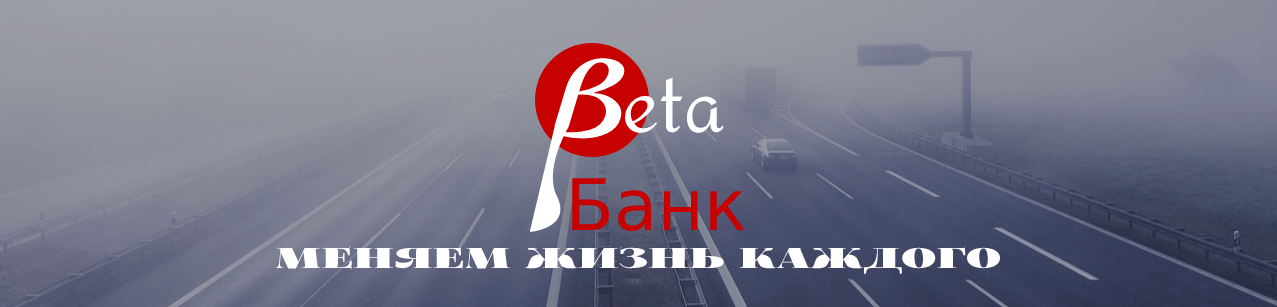

<h1><font color="#c70000">Прогнозирование оттока клиентов в "βeta-Банк"</font></h1>

In [2]:
def path_remover(path=''):
    import sys
    for el in sys.path:
        if el == path:
            sys.path.remove(path)

class Formatter(object):
    def __init__(self):
        self.types = {}
        self.htchar = '\t'
        self.lfchar = '\n'
        self.indent = 0
        self.set_formater(object, self.__class__.format_object)
        self.set_formater(dict, self.__class__.format_dict)
        self.set_formater(list, self.__class__.format_list)
        self.set_formater(tuple, self.__class__.format_tuple)

    def set_formater(self, obj, callback):
        self.types[obj] = callback

    def __call__(self, value, **args):
        for key in args:
            setattr(self, key, args[key])
        formater = self.types[type(value) if type(value) in self.types else object]
        return formater(self, value, self.indent)

    def format_object(self, value, indent):
        if 'DataFrame' in str(type(value)):
            return str(type(value))
        else:
            return repr(value)

    def format_dict(self, value, indent):
        items = [
            self.lfchar + self.htchar * (indent + 1) + repr(key) + ': ' +
            (self.types[type(value[key]) if type(value[key]) in self.types else object])(self, value[key], indent + 1)
            for key in value
        ]
        return '{%s}' % (','.join(items) + self.lfchar + self.htchar * indent)

    def format_list(self, value, indent):
        items = [
            self.lfchar + self.htchar * (indent + 1) + (self.types[type(item) if type(item) in self.types else object])(self, item, indent + 1)
            for item in value
        ]
        return '[%s]' % (','.join(items) + self.lfchar + self.htchar * indent)

    def format_tuple(self, value, indent):
        items = [
            self.lfchar + self.htchar * (indent + 1) + (self.types[type(item) if type(item) in self.types else object])(self, item, indent + 1)
            for item in value
        ]
        return '(%s)' % (','.join(items) + self.lfchar + self.htchar * indent)
        


def color_nan_red(val, marker=None, table=None):

    general_style = 'font-weight:bold;text-transform: capitalize;'
    
    nan_class    = general_style + 'color: red;'
    unknow_class = general_style + 'color: #9c27b0;'
    value_class  = ''
    
    max_class    = general_style + 'color: #ff6f00;'
    min_class    = general_style + 'color: #0d64a1;'
    
    classes_list = []
    
    for i, cell in enumerate(val):
        if marker:
            if i in marker.keys():
                
                
                if ('str' in str(type(marker[i])) and 'str' in str(type(cell))):
                    if cell == marker[i]:
                        classes_list.append(nan_class)
                        continue
                elif 'list' in str(type(marker[i])):
                    if marker[i][0] == 'min' and cell == marker[i][1]:
                        classes_list.append(min_class)
                        continue
                    elif marker[i][0] == 'max' and cell == marker[i][1]:
                        classes_list.append(max_class)
                        continue
                    elif marker[i][0] == 'max_min' and cell in marker[i]:
                        if 'str' not in str(type(cell)):
                            if cell == min(item for item in marker[i][1:] if 'str' not in str(type(item))):
                                classes_list.append(min_class)
                                continue
                            elif cell == max(item for item in marker[i][1:] if 'str' not in str(type(item))):
                                classes_list.append(max_class)
                                continue
                        elif 'str' in str(type(cell)):
                            if cell == min(item for item in marker[i][1:] if 'str' in str(type(item))):
                                classes_list.append(min_class)
                                continue
                            elif cell == max(item for item in marker[i][1:] if 'str' in str(type(item))):
                                classes_list.append(max_class)
                                continue
                    elif cell in marker[i]:
                        if 'str' not in str(type(cell)):
                            if cell == min(item for item in marker[i] if 'str' not in str(type(item))):
                                classes_list.append(min_class)
                                continue
                            elif cell == max(item for item in marker[i] if 'str' not in str(type(item))):
                                classes_list.append(max_class)
                                continue
                            else:
                                classes_list.append(unknow_class)
                                continue
                        elif 'str' in str(type(cell)):
                            if cell == min(item for item in marker[i] if 'str' in str(type(item))):
                                classes_list.append(min_class)
                                continue
                            elif cell == max(item for item in marker[i] if 'str' in str(type(item))):
                                classes_list.append(max_class)
                                continue
                            else:
                                classes_list.append(unknow_class)
                                continue            
                    elif marker[i][0] == '>':
                        if 'list' in str(type(marker[i][1])):
                            if all(cell > j for j in marker[i][1]):
                                classes_list.append(nan_class)
                                continue
                        else:    
                            if cell > marker[i][1]:
                                classes_list.append(nan_class)
                                continue
                    elif marker[i][0] == '<':
                        if 'list' in str(type(marker[i][1])):
                            if all(cell < j for j in marker[i][1]):
                                classes_list.append(min_class)
                                continue
                        else:    
                            if cell < marker[i][1]:
                                classes_list.append(min_class)
                                continue
                    elif marker[i][0] == '=':
                        if cell == marker[i][1]:
                            classes_list.append(unknow_class)
                            continue
                        if cell in marker[i][1]:
                            classes_list.append(unknow_class)
                            continue
                    elif marker[i][0] == 'top':
                        if cell in list(table.iloc[:, i].head(marker[i][1])):
                            classes_list.append(unknow_class)
                            continue
                    elif marker[i][0] == 'out':
                        if cell in list(table.iloc[:, i].tail(marker[i][1])):
                            classes_list.append(unknow_class)
                            continue
                    
                                
                elif ('str' not in str(type(marker[i])) and 'str' not in str(type(cell))) and  cell >= marker[i]:
                    classes_list.append(nan_class)
                    continue 
        
        if pd.isna(cell):
            classes_list.append(nan_class)
            continue
        elif cell == 'unknown':
            classes_list.append(unknow_class)
            continue
        
        classes_list.append(value_class)
        continue
        
    return classes_list
    

def set_format(*args):
    print(args)
    
    for i, idx in enumerate(args[0]):
        print(i, ":", idx)
        
    if 'str' in str(type(args[1])):
        if 'float' in str(type(args[0])):
            return args[1].format(args[0])
        else:
            return args[0]
    elif 'list' in str(type(args[1])):
        if args[1][0] == 'datetime':
            return datetime.strptime(args[0], args[1][1]).strftime(args[1][2])
        elif args[1][0] == 'float':
            print(args[1][1],':', args[0])
            return args[1][1].format(args[0])
          
    return args[0]



def check_float(val,format='default'):
    if 'float' in str(type(val)):
        if format == 'default':
            return val
        else:
            return format.format(val)
    else:
        return val
    
    
def render(*args, format='default', border='false', position='center_header', marker=None, name='', width='', vartype=False):
    '''
    format   = {:.2f} Заменяет все float числа в формат
    format   = [ [[column_list], [type_format, value_format]] ] - применяет указанный формат к указанным столбцам.
    
        примеры:
        format=[ [['column_1','column_2'], '{:.2f}'] ]
        format=[ [['column_1','column_2'], ['float', '{:.2f}']] ]
        format=[ [['column_1','column_2'], ['datetime', '%Y%m%dT%H%M%S', '%d.%m.%Y %H:%M:%S']] ]
        format=[ [['column_1','column_2'], '<b style="color:red">{}</b>'] ] - применяем стиль к значению
    
    format   = 'json' - преобразовывает в json формат
    
    border   = display(d) | horizont(h) | vertical(v)
    
    position = left | center | right | left_header | center_header | right_header
    
    marker   = [['column_name', value]] все значения >=  value будут помечены красным цветом
    
    marker   = [['column_name', 'max_min']] будут отмечены максимальное и минимальное значение цветом
    marker   = [['column_name', 'min']]
    marker   = [['column_name', 'max']]
    
    marker   = [['column_name', ['>', 1000]]]
    marker   = [['column_name', ['<', 'value']]]
    
    name     = 'Test title'  Добавляет описание к таблице
    
    width    = auto | 100% | 300 | 600 | 900 Делает ширину таблицы, указаного значения
    
    type     = True Выводит имя переменной и его тип
    '''
    
    
    
    border_style   = ''
    position_style = ''
    
    title          = ''
    width_value    = ''
    type_value     = ''
    
    if name != '':
        title = ' data-title="' + name + '" '
        
    if width != '':
        width_value = ' data-width="' + width + '" '
    
    if vartype == True:
        type_value = ' data-type="[template]" '
    
    if border == 'display' or border == 'd':
        border_style = ' border_display'
    elif border == 'horizont' or border == 'h':
        border_style = ' border_horizont'
    elif border == 'vertical' or border == 'v':
        border_style = ' border_vertical'
    else:
        border_style = ''
    
    
    if position == 'left':
        position_style = ' position_left'
    elif position == 'center':
        position_style = ' position_center'
    elif position == 'right':
        position_style = ' position_right'
    elif position == 'left_header':
        position_style = ' position_left_header'
    elif position == 'center_header':
        position_style = ' position_center_header'
    elif position == 'right_header':
        position_style = ' position_right_header'
    else:
        position_style = ''
    
    
    
    if 'Series' in str(type(args[0])) or 'DataFrame' in str(type(args[0])): 
        df = args[0]
    else:
        df = args
    
    if 'Series' in str(type(df)): df = df.to_frame()
    
    if 'Series' in str(type(df)) or 'DataFrame' in str(type(df)):
        
        render_df = df.copy()
        
        
        
        if len(render_df.index) == 0:
            render_df.loc[render_df.shape[0]] = ''
        
        
        
        columns = render_df.columns
        need_columns = {}
        
        if marker:
            for need_clmn in marker:
                for i, clmn in enumerate(columns):
                    if need_clmn[0] == clmn:
                        if need_clmn[1] in ['min', 'max', 'max_min']:
                            if need_clmn[1] == 'min':
                                need_columns[i] = ['min', df[clmn].min()]
                            elif need_clmn[1] == 'max':
                                need_columns[i] = ['max', df[clmn].max()]
                            elif need_clmn[1] == 'max_min':
                                need_columns[i] = ['max_min', df[clmn].min(), df[clmn].max()]
                        else:
                            need_columns[i] = need_clmn[1]

        if vartype == True:
            type_value = type_value.replace("[template]", var_name(render_df))
            print(render_df, var_name(render_df))   
        
        #Render Style
        render_df = render_df.style.set_table_attributes('class="table_border' + border_style + position_style + '"' + title + width_value + type_value).apply(color_nan_red,marker=need_columns,table=df, axis=1)
        
        #print(str(type(render_df))) 
        
        #render_df.format(escape='html')
        
 
        if format != 'default':
            if 'str' in str(type(format)):
                render_df = render_df.format(lambda x: format.format(x) if 'float' in str(type(x)) else x )
            elif 'list' in str(type(format)):
                need_columns = {}
                for list_format in format:

                    s_type = None
                    s_type = list_format[1]
                    
                    for clmns_list in list_format[0]:
                        if 'str' in str(type(s_type)):
                            need_columns[clmns_list] = str_format(s_type)
                            continue
                        elif 'list' in str(type(s_type)):

                            if s_type[0] == 'float':
                                need_columns[clmns_list] = float_format(s_type[1])
                                continue
                            
                            elif s_type[0] == 'datetime':
                                need_columns[clmns_list] = time_format(s_type[1], s_type[2])
                                continue
                            
                            elif s_type[0] == 'link':
                                need_columns[clmns_list] = link_format(s_type[1])
                                continue
                            
                            else:
                                continue
                
                #print(need_columns)
                render_df = render_df.format(formatter=need_columns)
                                                
    else: 
        list_args = []
        
        for value in df: 
            #Render float format
            if format != 'default':
                if format == 'json':
                    pretty = Formatter()
                    list_args.append(pretty(value))
                else:
                    list_args.append(str(check_float(value,format)))
            else:
                list_args.append(str(value))
        
        render_df = ' '.join(list_args).replace('<', '&#60;').replace('>', '&#62;')
        
        if vartype == True:
            type_value = type_value.replace("[template]", var_name(render_df))
            print(df, var_name(df))
            
        from IPython.display import HTML
        render_df = HTML('<p class="value" ' + title + type_value + '><code>' + str(render_df) + '</code></p>')
        
        
    return display(render_df)


def str_format(y):
    return lambda x: y.format(x)
    
def float_format(y):
    return lambda x: y.format(x)

def link_format(y):
    if y != '':
        return lambda x: '<a href="{}" title="{}">{}</a>'.format(x, y, y)
    else:
        return lambda x: '<a href="{}" title="{}">{}</a>'.format(x, x, x)
    
def time_format(y, z):
    if y == '':
        y = '%Y%m%dT%H%M%S'
    if z == '':
        z = '%d.%m.%Y %H:%M:%S'
    return lambda x: datetime.strptime(x, y).strftime(z)

In [1]:
%%HTML
<style> 
    
    .bank-logo img {
        margin-left: 0px;
        width: 40px;
        border-radius: 20px !important;
        box-shadow: 1px 2px 3px 1px #33333340 !important;
        display: inline-block;
        margin-right: 2px;
    }
    
    #project_logo
    {
        height: 150px;
    }
    
    #logo_bg
    {
        text-align: right;
        color: white;
        font-family: monospace;
        height: 100px;
        background: 
            repeating-linear-gradient(
                248deg, 
                rgba(0 , 188 , 212 , 0.24), 
                rgba(255 , 0 , 0 , 0), 
                rgba(0 , 188 , 212 , 0.5) 5px
            ), 
            repeating-linear-gradient(
                180deg, 
                #9e9e9e, 
                rgba(0 , 255 , 0 , 0) 70.71%
            ), 
            repeating-linear-gradient(
                0deg, 
                #607d8b, 
                rgba(0 , 0 , 255 , 0) 70.71%
            );
    }
    
    #logo_text 
    {
        font-size: 100px; 
        font-weight: bold; 
        font-family: monospace; 
        color: #607d8b; 
        line-height: 100px; 
        text-shadow: 10px 0 0 rgba(255 , 255 , 255 , 0.45), 
            -2px 0 0 #fff, 
            0 1px 0 #fff, 
            0 -1px 0 #fff, 
            1px 1px #fff, 
            -1px -1px 0 #fff, 
            1px -1px 0 #fff,
            -1px 1px 0 #fff, 
            10px 19px 4px; 
        opacity: 0.8; 
        text-align: center;
    }
    
    #project_author
    {
        width: 160px;
        height: 30px;
        line-height: 10px;
        display: inline-block;
        background-color: #ff5722;
        padding: 10px;
        border-radius: 0px 0px 20px 20px;
        text-align: center;
        box-shadow: 3px 2px 3px 2px #ccc;
        margin: 0;
        margin-right: 40px;
    }
    
    
    .content.body strong {
        display: block;
        line-height: 2px;
    }
    
    .content.body {
        box-shadow: inset 1px 1px 6px 1px #3c3c3c9e;
        border: 1px solid #0000007a;
        background: linear-gradient(92deg, rgba(55, 61, 90, 0.9), rgba(118, 0, 0, 0.85));
        color: white;
        border-radius: 30px;
        padding: 13px;
    }
    
    .content.block {
        background: repeating-linear-gradient(45deg, rgba(54, 61, 84, 0.5), rgba(52, 58, 86, 0.5) 10px, #00adff 10px, #c70000 12px);
        padding: 20px;
        border-radius: 40px;
    }
                                              
                                              
    .description li {
        padding: 8px;
    }
    
    .description li p {
        color: darkred;
        font-weight: bold;
    }                                          
       
                                              
    .content.text p {
        line-height: 8px;
    }
    
    .content.display {
        background: rgba(255, 255, 255, 0.7);
        color: #3a405d;
        padding: 10px;
        border-radius: 0px 0px 10px 10px;
    }
                                              
    /****END***TARIFFS***********/
    
    h1, h2, h3 {
        padding: 10px;
        color: #333955;
    }
    
    div.ow_fl {
        overflow: auto;
    }
    
    div.ow_fl p {
        display:flex;
    }
    
    .rendered_html :link {
        text-decoration: none;
    }
        
    a:hover, a:focus {
        color: #1a466c;
        text-decoration: underline !important;
    }
    
    #notebook-container {
        /*width: 1700px;*/
    }
    
    #notebook-container .cell:nth-child(3) {
        display: none;
    }
    
    #notebook-container .cell:nth-child(4) {
        display: none;
    }
    
    table {float: left;}
    table td, table th, table tr {
        text-align:left !important;
    }
    
    .menu_table thead,
    .menu_table tbody,
    .menu_table tr
    {
        border: none !important;
        background: none !important;
        cursor: default;
    }
    
    .menu_table thead {
        display: none;
    }
    
    .clearfix {
        clear: both;
    }
    
    
    /*----BLOCKS-------------*/
    
    .rendered_html em del 
    {
        text-decoration: none;
        border: 1px solid gray;
        border-radius: 10px;
        padding: 2px;
        background: bisque;
        box-shadow: 1px 1px 3px grey;
        font-style: italic;
        font-weight: bold;
        color: brown;
        line-height: 30px;
    }
    
    .rendered_html del {
        text-decoration: none !important;
    }
    
    
    .rendered_html strong em,
    .rendered_html em strong 
    {
        
        display: block;
        border-radius: 5px;
        padding: 15px;
        font-style: normal !important;
        text-decoration: none;
    }
    
    .rendered_html strong em
    {
        background: rgba(66, 165, 245, 0.2);
        color: rgba(0, 0, 0, 0.8);
        font-weight: normal;
    }
    
    .rendered_html em strong
    {
        background: rgba(232, 245, 233, 1);
        color: rgba(0, 0, 0, 0.8);
        font-weight: normal;
    }

    .rendered_html strong em code,
    .rendered_html em strong code
    {
        background: white;
        border-radius: 4px;
        padding: 2px !important;
    }    


    /*-----TABLE---------*/
    
    .table_border {
        border-radius: 10px;
        border: 1px solid #ccc !important;
        margin: 5px;
        margin-top: 40px !important;
        padding: 5px;
        display: inline-block;
        cursor: default;
        box-shadow: 5px 4px 5px 1px rgba(0, 0, 0, 0.07);
    }
    
    .table_border:before, 
    p.value:before 
    {
        content: attr(data-title);
        position: absolute;
        display: block;
        margin-block: auto;
        margin-top: -25px;
        /*color: rgb(0 0 0 / 30%);*/
        color: #4caf50;
        font-size: 10px;
    }

    p:before 
    {
        margin-top: -15px !important;
    }
    
    p.value 
    {
        padding-top: 40px;
    }
    
    .table_border thead, 
    .table_border thead tr, 
    .table_border thead th {
        color: #03a9f4;
        vertical-align: middle;
    }
    

    .table_border thead tr
    {
        background: rgba(66, 165, 245, 0.2) !important;
        border-bottom: 1px solid #b2ebf2 !important;
        padding: 1px;
    }
    
    .table_border tbody td:hover
    {
        font-weight: bold;
        color: #03a9f4;
    }

    .table_border thead tr:first-child th:first-child {
        border-radius: 10px 0px 0px 0px;
    }

    .table_border thead tr:first-child th:last-child {
        border-radius: 0px 10px 0px 0px;
    }
    
    .table_border tbody tr:last-child:hover
    {
        border-radius: 0px 0px 10px 10px;
        padding: 0px;
    }
    
    .table_border tbody tr:last-child:hover th,
    .table_border tbody tr:last-child:hover td {
        background: antiquewhite !important;
    }

    .table_border tbody tr:hover,
    .table_border tbody tr:hover th,
    .table_border tbody tr:hover td,
    .table_border tbody tr:hover > th,
    .table_border tbody td.active
    {
        background: rgba(66, 165, 245, 0.2) !important;
    }
    
    .table_border tbody tr:last-child:hover th,
    .table_border tbody tr:last-child:hover td:first-child {
        border-radius: 0px 0px 0px 10px;
        display: table-cell;
    }
    
    .table_border tbody tr:last-child:hover td:last-child {
        border-radius: 0px 0px 10px 0px;
        display: table-cell;
    }
    
    .table_border tbody tr,
    .table_border tbody th,
    .table_border tbody td
    {
        background: white;
    }
    
    .table_border tbody td {
        min-width: 120px;
    }
    
    .table_border tbody tr .row_heading {
        color: rgba(0,0,0,0.2)
    }
    
    .table_border td.table_border_td_nan {
        font-weight: bold;
        text-transform: capitalize;
        color: red;
    }

    .table_border tbody tr:hover .row_heading {
        color: #1565c0;
    }
    
    /*
    ++++++++++++++++++++++
    .table_border {
        border-radius: 13px;
        border: 1px solid #ccc !important;
        margin: 5px;
        padding: 5px;
        display: inline-block;
        cursor: default;
        box-shadow: 5px 4px 5px 1px rgba(0, 0, 0, 0.07);
    }
    
    .table_border table, 
    {
        border-collapse: separate;
    }
    
    .table_border thead,
    .table_border thead tr,
    .table_border thead th
    {
        text-align: center !important;
        color: #03a9f4;
    }
    
    
    .table_border thead th
    {
        border-right: 1px solid;
    }
    
    .table_border thead th:last-child
    {
        border-right: none;
    }
    
    .table_border thead
    {
        display: table-caption;
        border: none !important;
    }
    
    .table_border tbody
    {
        border: none !important;
        display: table-cell;
    }
    
    ++++++++++++++++++++++
    .table_border thead tr
    {
        background: rgba(66, 165, 245, 0.2) !important;
        border-bottom: 1px solid #b2ebf2 !important;
        display: table-row;
        padding: 1px;
    }
    
    ++++++++++++++++++++++
    .table_border thead tr:first-child th:first-child {
        display: table-cell;
        border-radius: 10px 0px 0px 0px;
    }
    ++++++++++++++++++++++
    .table_border thead tr:first-child th:last-child {
        display: table-cell;
        border-radius: 0px 10px 0px 0px;
    }
    
    .table_border thead th
    {
        word-break: inherit;            
    }

    .table_border th, .table_border tbody td {
        width: 110px;
        word-break: break-word;
    }
    
    .table_border tbody tr
    {
        background: none !important;
    }
    
    ++++++++++++++++++++++
    .table_border tbody tr:hover,
    .table_border tbody td.active
    {
        background: rgba(66, 165, 245, 0.2) !important;
    }
    
    ++++++++++++++++++++++
    .table_border tbody td:hover
    {
        font-weight: bold;
        color: #03a9f4;
    }
    
    .table_border tbody tr:last-child:hover
    {
        border-radius: 0px 0px 10px 10px;
        display: block;
        padding: 0px;
        background: antiquewhite !important;
    }
    
    /*.table_border th, 
    .table_border td
    {
        width: 250px !important;
        word-break: break-word;
    }*/
    
    
    .sea_war th,
    .sea_war td
    {
        width: 26px !important;
    }
    
    .sea_war tbody th,
    .sea_war tbody td
    {
        border: 1px solid rgba(0,0,0,0.1);
    }
    
    .sea_war tbody th
    {
        color: rgba(0,0,0,0.5);
        text-align: center !important;
    }
    
    /*---------------Borders------------------------*/
    
    /* border_horizont  */
    .border_horizont tbody th, 
    .border_horizont tbody td
    {
        border-bottom: 1px solid rgba(0,0,0,0.04);
    }
    
    .border_horizont tbody tr:last-child th, 
    .border_horizont tbody tr:last-child td
    {
        border-bottom: none;
    }
    
    /* border_vertical  */
    .border_vertical tbody th, 
    .border_vertical tbody td
    {
        border-right: 1px solid rgba(0,0,0,0.04);
    }
     
    .border_vertical tbody td:last-child
    {
        border-right: none;
    }
    
    /* border_display  */
    .border_display tbody th, 
    .border_display tbody td
    {
        border: 1px solid rgba(0,0,0,0.04);
    }
    .border_display tbody th,
    .border_display tbody td
    {
        border-left: none;
        border-top: none;
    }
    .border_display tbody td:last-child
    {
       border-right: none; 
    }
    .border_display tbody tr:last-child th,
    .border_display tbody tr:last-child td 
    {
        border-bottom: none;
    }
    
    
    /* positions  */
    
    .position_left thead th,
    .position_left tbody td {
        text-align: left !important;
    }
    
    .position_center thead th,
    .position_center tbody td {
        text-align: center !important;
    }

    .position_right thead th,
    .position_right tbody td {
        text-align: right !important;
    }
    
    .position_left_header thead th {
        text-align: left !important;
    }
    
    .position_center_header thead th {
        text-align: center !important;
    }
    .position_right_header thead th {
        text-align: right !important;
    }
    
    /*---------------Code------------------------*/
    .rendered_html p code,
    .rendered_html ul code,
    .rendered_html pre code[class*="custom"]
    {
        background-color: #d9edfd;
        color: #4c4c4c;
        font-size: 16px !important;
        border-radius: 10px;
        font-weight: bold;
        border: 1px solid #ccc !important;
        padding: 5px !important;
        line-height: 19px !important;
        display: inline-block;
        margin: 5px 0px 0px 0px;
        word-break: break-word;
    }
    
    .rendered_html code span[class*="-bold"]
    {
        font-weight: bold;
    }
    
    .rendered_html code span[class*="-italic"]
    {
        font-style: italic;
    }
    
    .rendered_html code span[class*="-marker"]
    {
        background: #ffeb3b8c;
        font-weight: bold;
        border: 1px solid #9e9e9e;
        box-shadow: 1px 1px 5px 0px #00000045;
        border-radius: 4px;
        padding: 2px;
        opacity: 0.8;
        line-height: 30px;
    }

    .rendered_html code[class*="error"] {
        color: red !important;
        background-color: rgba(244, 67, 54, 0.1) !important;
        font-weight: normal !important;
    }
    
    .rendered_html code[class*="warning"] {
        color: #ff9800 !important;
        background-color: rgba(244, 243, 54, 0.1) !important;
        font-weight: normal !important;
    }

    .rendered_html code[class*="info"] {
        color: green !important;
        background-color: rgb(54, 244, 91, 0.1) !important;
        font-weight: normal !important;
    }
    
    .rendered_html code[class*="word"] {
        color: #00bcd4 !important;
        background-color: rgba(54, 195, 244, 0.1) !important;
        font-weight: normal !important;
    }
    
    /*---------------Imgs------------------------*/
    .rendered_html img
    {
        border-radius: 16px;
        border: 1px solid rgb(0 0 0 / 25%);
        box-shadow: 5px 6px 8px 1px hsl(0deg 0% 0% / 25%);
        padding: 4px;
        margin-bottom: 10px;
        max-width: 65em;
    }
    
    #ipython_notebook:after {
        content: '@alefair кодит';
        position: relative;
        color: #2196f3;
        bottom: 7px;
        right: -35px;
    }
                                                 
   .total .banner {
        background: repeating-linear-gradient(45deg, rgba(54, 61, 84, 0.5), rgba(52, 58, 86, 0.5) 10px, #00adff 10px, #c70000 12px);
        height: 40px;
        border: 4px solid rgb(39, 251, 171, 0.22);
    /* border-bottom: none; */
    /* box-shadow: 0px 8px 6px 1px #5e5e5e;*/
   }
                                                 
   .total .description {
        border: 1px solid #999;
        border-top: none;
        padding: 20px;
        font-family: monospace;
   }
                                                 
   .total .description h3,
   .total .description h4                                              
   {
        font-weight: bold;
        font-size: 16px;
        color: #c70000;
        margin-bottom: 10px;
   }
                                                 
   .total .description .content {
        color: #333;
        font-size: 13px;
        border-radius: 10px;
        overflow: hidden;
        box-shadow: 1px 1px 3px 2px rgba(0, 0, 0, 0.3);
   }
                                                 
    .ribbon {
        text-align: center;
        display: block;
        width: 150px;
        height: 40px;
        background: #ff5722;
        color: white;
        font-family: monospace;
        padding-top: 10px;
    }
    .ribbon:after {
        content: "";
        display: block;
        position: relative;
        top: 10px;
        width: 0px;
        height: 0;
        border-width: 10px 75px 50px 75px;
        border-style: solid;
        border-color: #ff5722 #d00202 transparent #d00202;
    }
</style>

<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <p class="bank-logo">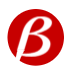<font color="#c70000">eta</font>-Банк просит проанализировать данные и спрогнозировать, <b>уйдет ли клиент из банка или нет</b>.</p>
        <p>Есть информация, что из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: <b>сохранять текущих клиентов дешевле, чем привлекать новых</b>.</p>
        <p>Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.</p>
        <p><a href="https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling">Источник данных</a></p>
        <p>Модель с предельно большим значением F1-меры, как минимум 0.59, может помочь.</p>
        <p>Также необходимо проверить F1-меру на тестовой выборке, измерить AUC-ROC и сравнить её значение с F1-мерой.</p>
    </div>
</div>

ссылка на git проекта: https://github.com/Alefair/ya_git

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Считываем-файл" data-toc-modified-id="Считываем-файл-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Считываем файл</a></span></li><li><span><a href="#Вспомогательные-функции-и-методы" data-toc-modified-id="Вспомогательные-функции-и-методы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вспомогательные функции и методы</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Соотношение-целевого-признака-Exited" data-toc-modified-id="Соотношение-целевого-признака-Exited-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Соотношение целевого признака Exited</a></span></li><li><span><a href="#Словарь-данных" data-toc-modified-id="Словарь-данных-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Словарь данных</a></span></li><li><span><a href="#Модель-Логистической-Регрессии" data-toc-modified-id="Модель-Логистической-Регрессии-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Модель Логистической Регрессии</a></span><ul class="toc-item"><li><span><a href="#Вывод.--Модель-Логистической-Регрессии" data-toc-modified-id="Вывод.--Модель-Логистической-Регрессии-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Вывод.  Модель Логистической Регрессии</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров-решающего-дерева" data-toc-modified-id="Подбор-гиперпараметров-решающего-дерева-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Подбор гиперпараметров решающего дерева</a></span><ul class="toc-item"><li><span><a href="#Вывод.-Решающее-дерево" data-toc-modified-id="Вывод.-Решающее-дерево-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Вывод. Решающее дерево</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров-Случайного-Леса" data-toc-modified-id="Подбор-гиперпараметров-Случайного-Леса-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Подбор гиперпараметров Случайного Леса</a></span><ul class="toc-item"><li><span><a href="#Вывод.-Случайный-лес" data-toc-modified-id="Вывод.-Случайный-лес-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>Вывод. Случайный лес</a></span></li></ul></li><li><span><a href="#Общий-Вывод-по-показателям-F1-меры-и-AUC-ROC" data-toc-modified-id="Общий-Вывод-по-показателям-F1-меры-и-AUC-ROC-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Общий Вывод по показателям F1-меры и AUC-ROC</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Баланс-Модель-Логистической-Регрессии" data-toc-modified-id="Баланс-Модель-Логистической-Регрессии-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Баланс Модель Логистической Регрессии</a></span><ul class="toc-item"><li><span><a href="#Сравнение-значений-метрик.-Модель-Логистической-Регрессии" data-toc-modified-id="Сравнение-значений-метрик.-Модель-Логистической-Регрессии-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Сравнение значений метрик. Модель Логистической Регрессии</a></span></li><li><span><a href="#Вывод.-Модель-Логистической-Регрессии" data-toc-modified-id="Вывод.-Модель-Логистической-Регрессии-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Вывод. Модель Логистической Регрессии</a></span></li></ul></li><li><span><a href="#Баланс.-Решающее-дерево" data-toc-modified-id="Баланс.-Решающее-дерево-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Баланс. Решающее дерево</a></span><ul class="toc-item"><li><span><a href="#Сравнение-значений-метрик.-Решающее-дерево" data-toc-modified-id="Сравнение-значений-метрик.-Решающее-дерево-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Сравнение значений метрик. Решающее дерево</a></span></li><li><span><a href="#Вывод.-Решающее-дерево" data-toc-modified-id="Вывод.-Решающее-дерево-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Вывод. Решающее дерево</a></span></li></ul></li><li><span><a href="#Баланс.-Случайный-лес" data-toc-modified-id="Баланс.-Случайный-лес-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Баланс. Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Сравнение-значений-метрик.-Случайный-лес" data-toc-modified-id="Сравнение-значений-метрик.-Случайный-лес-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Сравнение значений метрик. Случайный лес</a></span></li><li><span><a href="#Вывод.-Случайный-лес" data-toc-modified-id="Вывод.-Случайный-лес-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Вывод. Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Порог-классификации" data-toc-modified-id="Порог-классификации-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Порог классификации</a></span><ul class="toc-item"><li><span><a href="#Порог-классификации.-Модель-Логистической-Регрессии" data-toc-modified-id="Порог-классификации.-Модель-Логистической-Регрессии-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Порог классификации. Модель Логистической Регрессии</a></span><ul class="toc-item"><li><span><a href="#Вывод.-Модель-Логистической-Регрессии" data-toc-modified-id="Вывод.-Модель-Логистической-Регрессии-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Вывод. Модель Логистической Регрессии</a></span></li></ul></li><li><span><a href="#Порог-классификации.-Решающее-дерево" data-toc-modified-id="Порог-классификации.-Решающее-дерево-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Порог классификации. Решающее дерево</a></span><ul class="toc-item"><li><span><a href="#Вывод.-Решающее-дерево" data-toc-modified-id="Вывод.-Решающее-дерево-9.2.1"><span class="toc-item-num">9.2.1&nbsp;&nbsp;</span>Вывод. Решающее дерево</a></span></li></ul></li><li><span><a href="#Порог-классификации.-Случайный-лес" data-toc-modified-id="Порог-классификации.-Случайный-лес-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Порог классификации. Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Вывод.-Случайный-лес" data-toc-modified-id="Вывод.-Случайный-лес-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Вывод. Случайный лес</a></span></li></ul></li><li><span><a href="#Общий-Вывод-по-борьбе-с-дисбалансом-классов" data-toc-modified-id="Общий-Вывод-по-борьбе-с-дисбалансом-классов-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Общий Вывод по борьбе с дисбалансом классов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Адекватность-модели" data-toc-modified-id="Адекватность-модели-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Адекватность модели</a></span></li><li><span><a href="#Вывод-по-тестированию" data-toc-modified-id="Вывод-по-тестированию-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Вывод по тестированию</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li></ul></div>

## Описание данных

<p>Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»)</p>
<br>
<div class="content block">
    <div class="content body">
        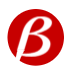
        <font color="white"><p><b>Признаки</b></p></font>
        <br>
        <strong><code>:: RowNumber       ::</code> — индекс строки в данных</strong><br>
        <strong><code>:: CustomerId      ::</code> — уникальный идентификатор клиента</strong><br>
        <strong><code>:: Surname         ::</code> — фамилия</strong><br>
        <strong><code>:: CreditScore     ::</code> — кредитный рейтинг</strong><br>
        <strong><code>:: Geography       ::</code> — страна проживания</strong><br>
        <strong><code>:: Gender          ::</code> — пол</strong><br>
        <strong><code>:: Age             ::</code> — возраст</strong><br>
        <strong><code>:: Tenure          ::</code> — сколько лет человек является клиентом банка</strong><br>
        <strong><code>:: Balance         ::</code> — баланс на счёте</strong><br>
        <strong><code>:: NumOfProducts   ::</code> — количество продуктов банка, используемых клиентом</strong><br>
        <strong><code>:: HasCrCard       ::</code> — наличие кредитной карты</strong><br>
        <strong><code>:: IsActiveMember  ::</code> — активность клиента</strong><br>
        <strong><code>:: EstimatedSalary ::</code> — предполагаемая зарплата</strong><br>
        <br>
        <br>
        <font color="white"><p><b>Целевой признак</b></p></font>
        <br>
        <strong><code>:: Exited          ::</code> — факт ухода клиента</strong><br>
     </div>
</div>

## Импорт библиотек

In [53]:
%matplotlib inline

import pandas as pd
import numpy as np

from IPython.display import Markdown as md
from matplotlib import pyplot as plt

import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.dummy import DummyClassifier

## Считываем файл

In [5]:
#Открываем файл
data = pd.read_csv("/datasets/Churn.csv", sep = ",")

## Вспомогательные функции и методы

In [6]:
def new_value_tenure(row):
    
    tenure = row.loc["Tenure"]
    gender = row.loc["Gender"]
    age = row.loc["Age"]

    if math.isnan(tenure):
        tenure = data.loc[(data["Age"] == age) & (data["Gender"] == gender)]["Tenure"].median()
    return tenure





def get_parameters_lr(dict_data, with_balance=False, with_class=False):
    data_lr = []
    
    if(with_balance):
        model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
    else:
        model = LogisticRegression(random_state=12345, solver='liblinear')
    
    
    model.fit(dict_data["features_train"], dict_data["target_train"])

    predictions = model.predict(dict_data["features_valid"])

    f1_score_valid = f1_score(dict_data["target_valid"], predictions)

    probabilities_valid = model.predict_proba(dict_data["features_valid"])
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(dict_data["target_valid"], probabilities_one_valid)
    
    if(with_class):
        for threshold in np.arange(0, 1, 0.02):
            predicted_valid = probabilities_one_valid > threshold
            f1_score_valid = f1_score(dict_data["target_valid"], predicted_valid )
            auc_roc = roc_auc_score(dict_data["target_valid"], probabilities_one_valid)
            data_lr.append([threshold, f1_score_valid, auc_roc])
        return pd.DataFrame(data=data_lr, columns=["threshold", "f1_score", "auc_roc"])
    else:
        data_lr.append([f1_score_valid, auc_roc])
        return pd.DataFrame(data=data_lr, columns=["f1_score", "auc_roc"])
    

    
    
def get_parameters_dc(dict_data, limit, with_parameters=False, with_balance=False, with_class=False):
    data_dc = []
    
    if(with_parameters):
        if(with_balance):
            model = DecisionTreeClassifier(random_state=12345, max_depth=limit, class_weight='balanced')
        else:
            model = DecisionTreeClassifier(random_state=12345, max_depth=limit)
            
        model.fit(dict_data["features_train"], dict_data["target_train"])
        
        probabilities_valid = model.predict_proba(dict_data["features_valid"])
        probabilities_one_valid = probabilities_valid[:, 1]
        
        for threshold in np.arange(0, 1, 0.02):
            predicted_valid = probabilities_one_valid > threshold
            f1_score_valid = f1_score(dict_data["target_valid"], predicted_valid )
            auc_roc = roc_auc_score(dict_data["target_valid"], probabilities_one_valid)
            data_dc.append([threshold, f1_score_valid, auc_roc])
        return pd.DataFrame(data=data_dc, columns=["threshold", "f1_score", "auc_roc"])
    else:
        for depth in range(1, limit):
            if(with_balance):
                model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
            else:
                model = DecisionTreeClassifier(random_state=12345, max_depth=depth)

            model.fit(dict_data["features_train"], dict_data["target_train"])

            predictions = model.predict(dict_data["features_valid"])

            #f1-score
            f1_score_valid = f1_score(dict_data["target_valid"], predictions)

            #AUC-ROC
            probabilities_valid = model.predict_proba(dict_data["features_valid"])
            probabilities_one_valid = probabilities_valid[:, 1]

            auc_roc = roc_auc_score(dict_data["target_valid"], probabilities_one_valid)

            data_dc.append([depth, f1_score_valid, auc_roc])


        return pd.DataFrame(data=data_dc, columns=["max_depth", "f1_score", "auc_roc"])




def get_parameters_rc(dict_data, limit, with_parameters=False, with_balance=False, with_class=False):
    data_rc = []

    if(with_parameters):
        if(with_balance):
            model = RandomForestClassifier(random_state=12345, n_estimators=limit, class_weight='balanced')
        else:
            model = RandomForestClassifier(random_state=12345, n_estimators=limit)
            
        model.fit(dict_data["features_train"], dict_data["target_train"])
        
        probabilities_valid = model.predict_proba(dict_data["features_valid"])
        probabilities_one_valid = probabilities_valid[:, 1]
        
        for threshold in np.arange(0, 1, 0.02):
            predicted_valid = probabilities_one_valid > threshold
            f1_score_valid = f1_score(dict_data["target_valid"], predicted_valid )
            auc_roc = roc_auc_score(dict_data["target_valid"], probabilities_one_valid)
            data_rc.append([threshold, f1_score_valid, auc_roc])
        return pd.DataFrame(data=data_rc, columns=["threshold", "f1_score", "auc_roc"])
    else:
        for est in range(1, limit):
            if(with_balance):
                model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
            else:
                model = RandomForestClassifier(random_state=12345, n_estimators=est)

            model.fit(dict_data["features_train"], dict_data["target_train"])

            predictions = model.predict(dict_data["features_valid"])

            #f1-score
            f1_score_valid = f1_score(dict_data["target_valid"], predictions)

            #AUC-ROC
            probabilities_valid = model.predict_proba(dict_data["features_valid"])
            probabilities_one_valid = probabilities_valid[:, 1]

            auc_roc = roc_auc_score(dict_data["target_valid"], probabilities_one_valid)

            data_rc.append([est, f1_score_valid, auc_roc])


        return pd.DataFrame(data=data_rc, columns=["n_estimators", "f1_score", "auc_roc"])

## Изучение данных из файла

In [7]:
rows_count = len(data)

#Фрагмент данных
render(data.head(), name="Фрагмент источника данных (" + str(rows_count) + " строк)")

#Структура данных
render("Структура и типы данных в колонках")
data.info()

render("Кол-во дублей в строках: {}\n".format(data.duplicated().sum()))

render("Посмотрим на данные...")

render(data["Geography"].value_counts(), name="Страна")

render(data["Age"].describe(), name="Возраст")
render(data["Tenure"].describe(), name="Сколько лет человек является клиентом банка")
render(data["Gender"].value_counts(), name="Пол")

#Числовые данные
render(data["CreditScore"].describe(), name="Кредитный рейтинг")
render(data["Balance"].describe(), name="Баланс на счёте")

render(data["EstimatedSalary"].describe(), name="Предполагаемая зарплата")
render(data[data["EstimatedSalary"] < 1000]["EstimatedSalary"].value_counts(), name="Баланс на счёте меньше 1000 единиц")

render(data["NumOfProducts"].value_counts(), name="Количество продуктов банка, используемых клиентом")
render(data["HasCrCard"].value_counts(), name="Наличие кредитной карты")
render(data["IsActiveMember"].value_counts(), name="Активность клиента")
render(data["Exited"].value_counts(), name="Факт ухода клиента")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.000000,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1.000000,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8.000000,159660.800000,3,1,0,113931.570000,1
3,4,15701354,Boni,699,France,Female,39,1.000000,0.000000,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.000000,125510.820000,1,1,1,79084.100000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,Geography
France,5014
Germany,2509
Spain,2477


,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


,Tenure
count,9091.000000
mean,4.997690
std,2.894723
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,10.000000


,Gender
Male,5457
Female,4543


,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


,Balance
count,10000.000000
mean,76485.889288
std,62397.405202
min,0.000000
25%,0.000000
50%,97198.540000
75%,127644.240000
max,250898.090000


,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


,EstimatedSalary
978.66,1
735.79,1
236.45,1
487.3,1
555.28,1
332.81,1
898.51,1
933.38,1
247.36,1
937.15,1


,NumOfProducts
1,5084
2,4590
3,266
4,60


,HasCrCard
1,7055
0,2945


,IsActiveMember
1,5151
0,4849


,Exited
0,7963
1,2037


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Результаты первичного анализа данных:</p>
        <ul>
            <li>Дублей не обнаружили</li>
            <li>
                <p>Столбец Tenure</p>
                <span>Видим, что есть пропуски. Скорее всего не был клиентом банка.</span>
                <span>Показатели количества лет, как клиент банка:</span>
                <span>Минимальный  </span><span>: <b>0</b></span>
                <span>Средний      </span><span>: <b>5</b></span>
                <span>Максимальный </span><span>: <b>10</b></span>
            </li>
            <li>
                <p>Столбец Geography</p>
                <span>Больше всего клиентов из Франции, остальные из Германии и Испании</span>
            </li>
            <li>
                <p>Столбец Age</p>
                <span>Минимальный  </span><span>возраст</span><span>: <b>18</b></span>
                <span>Средний      </span><span>возраст</span><span>: <b>37</b></span>
                <span>Максимальный </span><span>возраст</span><span>: <b>92</b></span>
            </li>
            <li>
                <p>Столбец Gender</p>
                <span>Среди клиентов банка больше мужчин, чем женщин: <b>5457</b> и <b>4543</b> соответственно</span>
            </li>
            <li>
                <p>Столбец CreditScore</p>
                <span>Кредитный рейтинг варьируется от <b>350</b> до <b>850</b></span>
            </li>
            <li>
                <p>Столбец Balance</p>
                <span>На балансе у клиентов от <b>0</b> до <b>250898</b></span>
            </li>
            <li>
                <p>Столбец EstimatedSalary</p>
                <span>Обнаружили подозрительно низкую зарплату в <b>11</b> единиц, скорее всего это опечатка</span>
                <span>И как оказалось много клиентов, у кого зарплата ниже <b>1000</b> единиц. Это явная ошибка</span>
                <span>Средняя зарплата: <b>100193</b></span>
                <span>Максимальная зарплата: <b>199992</b></span>
            </li>
            <li>
                <p>Столбец NumOfProducts</p>
                <span>У банка, согласно отчету, <b>4</b> основных продукта. В основном у клиентов <b>1-2</b> продукта, но и есть у кого и <b>3-4</b> продукта, но их меньшинство</span>
            </li>
            <li>
                <p>Столбец HasCrCard</p>
                <span><b>2/3</b> клиентов имеют кредитную карту, остальные - нет</span>
            </li>
            <li>
                <p>Столбец IsActiveMember</p>
                <span>По данным активности пока сложно что-то сказать</span>
            </li>
            <li>
                <p>Столбец Exited</p>
                <span><b>2037</b> клиентов покинуло банк, и нужно сохранить <b>7963</b> клиентов</span>
            </li>
        </ul>
        <p><b>Итог: </b></p>
        <p>- Проанализировав структуру данных можем удалить столбец <b>"RowNumber"</b>, так как данный столбец не несет никакую смысловую нагрузку.</p>
        <p>- Дополнительно, для подготовки модели, можем убрать из расчетов столбцы <b>"CustomerId"</b> и <b>"Surname"</b>.</p>
    </div>
</div>

## Подготовка данных

In [8]:
#Удалим столбцы
data = data.drop(columns={"RowNumber","CustomerId", "Surname"} , axis=1 )

In [9]:
render(data.describe())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
#На предыдущем этапе обнаружили пропуски и поэтому заполним пропуски
data["Tenure"] = data.apply(new_value_tenure, axis=1)
data.info()
render(data[(data["Tenure"].isna())])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,,,,,,,,,,,


In [11]:
# так как в данных есть категориальные признаки, это столбцы "Gender" и "Geography", а они могут влять на модель
# необходимо преобразовать эти данные в численные. Нам поможет техника прямого кодирования(OHE)
data_ohe = pd.get_dummies(data, drop_first=True)

render(data_ohe.head())

render(data_ohe.describe())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.000000,0.000000,1,1,1,101348.880000,1,0,0,0
1,608,41,1.000000,83807.860000,1,0,1,112542.580000,0,0,1,0
2,502,42,8.000000,159660.800000,3,1,0,113931.570000,1,0,0,0
3,699,39,1.000000,0.000000,2,0,0,93826.630000,0,0,0,0
4,850,43,2.000000,125510.820000,1,1,1,79084.100000,0,0,1,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.996150,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.765732,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [12]:
# в таблице возраст скачет от 18 до 92, а баланс от 0 до 250898.
# есть вероятность, что модель будет думать, что признак важнее возраста, а это может быть не так.
# для этого нужно стандартизировать данные, а для этого масштабируем их с помощью StandardScaler из библиотеки sklearn.preprocessing
# но это еще не все, для того, чтобы масштабировать, нужно разбить данные на обучающие, валидационную и тренировочную выборку в соотношении 3:1:1
# главным целевым признаком является столбец "Exited", его и исследуем

target = data_ohe["Exited"]
features = data_ohe.drop("Exited", axis=1)

features_train, features_data, target_train, target_data = train_test_split(
    features, 
    target, 
    test_size=0.4, 
    random_state=12345
)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_data, 
    target_data, 
    test_size=0.5, 
    random_state=12345
)

In [13]:
# Размеры полученных данных

print("features_train:  ", features_train.shape[0])
print("features_valid:  ", features_valid.shape[0])
print("features_test:   ", features_test.shape[0])

print("target_train:    ", target_train.shape[0])
print("target_valid:    ", target_valid.shape[0])
print("target_test:     ", target_test.shape[0])

features_train:   6000
features_valid:   2000
features_test:    2000
target_train:     6000
target_valid:     2000
target_test:      2000


In [14]:
# Запускаем масштабирование
scaler = StandardScaler()

scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test  = scaler.transform(features_test)

<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Подготовили данные:</p>
        <ul>
            <li>Удалили столбцы <b>"RowNumber", "CustomerId", "Surname"</b> так как они не нужны</li>
            <li>Заполнили пустые значения, в столбце <b>"Tenure"</b></li>
            <li>Преобразовали значения столбцов <b>"Gender"</b> и <b>"Geography"</b> в численные</li>
            <li>Разбили данные на обучающие, валидационную и тренировочную выборку</li>
            <li>Проверили на размер полученные данные</li>
            <li>Стандартизировали данные методом <b>StandardScaler</b></li>
        </ul>
    </div>
</div>

## Исследование задачи

### Соотношение целевого признака Exited

Из предыдущих проверок вяснили, что по данным 2037 клиентов покинуло банк, и нужно сохранить 7963 клиентов, посмотрим это в количественном эквиваленте

In [15]:
render(target_train.value_counts(normalize=True))

,Exited
0,0.800667
1,0.199333


Соотношение примерно 4:1, а не 1:1 - классы несбалансированы!

Баланс будет тогда, когда они будут равны.

Accuracy(точность) модели не подойдет, поэтому воспользуемся F1-мерой.

### Словарь данных

In [16]:
#Создадим словарь данных
dict_data = {}
dict_data["features_train"] = features_train
dict_data["features_valid"] = features_valid
dict_data["features_test"]  = features_test

dict_data["target_train"]   = target_train
dict_data["target_valid"]   = target_valid
dict_data["target_test"]    = target_test

#Создадим словарь моделей
dict_model = {}
dict_model["original"] = {}
dict_model["balanced"] = {}
dict_model["class"] = {}

### Модель Логистической Регрессии

In [17]:
lr_data = get_parameters_lr(dict_data)
print("Предсказание завершено!")

Предсказание завершено!


In [18]:
f1_score_valid = lr_data["f1_score"].values[0]
auc_roc        = lr_data["auc_roc"].values[0]

render(lr_data, position="center")


dict_model["original"]["lr"] = {}
dict_model["original"]["lr"]["fi"] = f1_score_valid
dict_model["original"]["lr"]["auc_roc"] = auc_roc
dict_model["original"]["lr"]["data"] = lr_data

,f1_score,auc_roc
0,0.336700,0.758546


#### Вывод.  Модель Логистической Регрессии

In [19]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>{:0.2f}</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>{:0.2f}</b></p>
    </div>
</div>
'''.format(
        f1_score_valid,
        auc_roc
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>0.34</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>0.76</b></p>
    </div>
</div>


### Подбор гиперпараметров решающего дерева

Необходимо найти основные показатели гиперпараметров: глубину дерева.

Попробуем на небольшом значении гипперпараметров:

- глубина(max_depth) = **16**
- random_state = **12345**

In [20]:
#Запустим подбор параметров
dc_data = get_parameters_dc(dict_data, 16)
print("Подбор параметров завершен!")

Подбор параметров завершен!


In [21]:
# Сравним 2 лучших показателя по f1_score и auc_roc
dc_f1_max  = dc_data[dc_data["f1_score"] == dc_data["f1_score"].max()]
dc_auc_roc_max = dc_data[dc_data["auc_roc"] == dc_data["auc_roc"].max()]

render(dc_f1_max,      position="center")
render(dc_auc_roc_max, position="center")

dict_model["original"]["dc"] = {}
dict_model["original"]["dc"]["fi"] = dc_f1_max
dict_model["original"]["dc"]["auc_roc"] = dc_auc_roc_max
dict_model["original"]["dc"]["data"] = dc_data

,max_depth,f1_score,auc_roc
5,6,0.569697,0.816463


,max_depth,f1_score,auc_roc
4,5,0.540625,0.822168


#### Вывод. Решающее дерево

In [22]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>{:0.2f}</b> достигается при max_depth=<b>{}</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>{:0.2f}</b> достигается при max_depth=<b>{}</b></p>
    </div>
</div>
'''.format(
        dc_f1_max["f1_score"].values[0],
        dc_f1_max["max_depth"].values[0],
        dc_auc_roc_max["auc_roc"].values[0],
        dc_auc_roc_max["max_depth"].values[0]
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>0.57</b> достигается при max_depth=<b>6</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>0.82</b> достигается при max_depth=<b>5</b></p>
    </div>
</div>


### Подбор гиперпараметров Случайного Леса

Необходимо найти основные показатели гиперпараметров: количество деревьев
Но нужно понимать, что,чем больше деревьев, тем дольше обучается модель!

Попробуем на небольшом значении гипперпараметров:

- количество деревьев (n_estimators) = **100**
- random_state = **12345**

In [23]:
#Запустим подбор параметров
rc_data = get_parameters_rc(dict_data, 100)
print("Подбор параметров завершен!")

Подбор параметров завершен!


In [24]:
# Сравним 2 лучших показателя по f1_score и auc_roc
rc_f1_max  = rc_data[rc_data["f1_score"] == rc_data["f1_score"].max()]
rc_auc_roc_max = rc_data[rc_data["auc_roc"] == rc_data["auc_roc"].max()]

render(rc_f1_max,      position="center")
render(rc_auc_roc_max, position="center")

dict_model["original"]["rc"] = {}
dict_model["original"]["rc"]["fi"] = rc_f1_max
dict_model["original"]["rc"]["auc_roc"] = rc_auc_roc_max
dict_model["original"]["rc"]["data"] = rc_data

,n_estimators,f1_score,auc_roc
60,61,0.585652,0.838944


,n_estimators,f1_score,auc_roc
90,91,0.576119,0.840941


#### Вывод. Случайный лес

In [25]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>{:0.2f}</b> достигается при n_estimators=<b>{}</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>{:0.2f}</b> достигается при n_estimators=<b>{}</b></p>
    </div>
</div>
'''.format(
        rc_f1_max["f1_score"].values[0],
        rc_f1_max["n_estimators"].values[0],
        rc_auc_roc_max["auc_roc"].values[0],
        rc_auc_roc_max["n_estimators"].values[0]
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>0.59</b> достигается при n_estimators=<b>61</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>0.84</b> достигается при n_estimators=<b>91</b></p>
    </div>
</div>


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Общий Вывод по показателям F1-меры и AUC-ROC</h3>
        <p>Результаты показателей:</p>
        <ul>
            <li>
                <p>Модель Логистической Регрессии</p>
                <span>Максимальное значение F1-меры <b>0.34</b></span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.76</b></span>
            </li>
            <li>
                <p>Модель Логистической Регрессии</p>
                <span>Максимальное значение F1-меры <b>0.57</b>, достигается при max_depth=<b>6</b></span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.82</b>, достигается при max_depth=<b>5</b></span>
            </li>
            <li>
                <p>Модель Логистической Регрессии</p>
                <span>Максимальное значение F1-меры <b>0.59</b>, достигается при n_estimators=<b>61</b></span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.84</b>, достигается при n_estimators=<b>91</b></span>
            </li>
        </ul>
    </div>
</div>

## Борьба с дисбалансом

Определим во сколько раз Exited=0 встречается чаще, чем Exited=1, для этого сблансируем добавив веса признаку.

### Баланс Модель Логистической Регрессии

In [26]:
lr_data = get_parameters_lr(dict_data, with_balance=True)
print("Предсказание завершено!")

Предсказание завершено!


In [27]:
f1_score_valid = lr_data["f1_score"].values[0]
auc_roc        = lr_data["auc_roc"].values[0]

dict_model["balanced"]["lr"] = {}
dict_model["balanced"]["lr"]["fi"] = f1_score_valid
dict_model["balanced"]["lr"]["auc_roc"] = auc_roc
dict_model["balanced"]["lr"]["data"] = lr_data

#### Сравнение значений метрик. Модель Логистической Регрессии

In [28]:
render(dict_model["original"]["lr"]["data"], position="center", name="1 проверка")
render(dict_model["balanced"]["lr"]["data"], position="center", name="Баланс")

,f1_score,auc_roc
0,0.336700,0.758546


,f1_score,auc_roc
0,0.488432,0.763540


#### Вывод. Модель Логистической Регрессии

In [29]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>{:0.2f}</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>{:0.2f}</b></p>
        <br>
        <p>Показатели метрик увеличились при балансировании</p>
    </div>
</div>
'''.format(
        f1_score_valid,
        auc_roc
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>0.49</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>0.76</b></p>
        <br>
        <p>Показатели метрик увеличились при балансировании</p>
    </div>
</div>


### Баланс. Решающее дерево

In [30]:
#Запустим подбор параметров
dc_data = get_parameters_dc(dict_data, 16, with_balance=True)
print("Подбор параметров завершен!")

Подбор параметров завершен!


In [31]:
# Сравним 2 лучших показателя по f1_score и auc_roc
dc_f1_max  = dc_data[dc_data['f1_score'] == dc_data['f1_score'].max()]
dc_auc_roc_max = dc_data[dc_data['auc_roc'] == dc_data['auc_roc'].max()]

dict_model["balanced"]["dc"] = {}
dict_model["balanced"]["dc"]["fi"] = dc_f1_max
dict_model["balanced"]["dc"]["auc_roc"] = dc_auc_roc_max
dict_model["balanced"]["dc"]["data"] = dc_data

#### Сравнение значений метрик. Решающее дерево

In [32]:
render("1 проверка")
render(dict_model["original"]["dc"]["fi"], position="center", name="Максимальный F1")
render(dict_model["original"]["dc"]["auc_roc"], position="center", name="Максимальный AUC_ROC")

render("Баланс")
render(dict_model["balanced"]["dc"]["fi"], position="center", name="Максимальный F1")
render(dict_model["balanced"]["dc"]["auc_roc"], position="center", name="Максимальный AUC_ROC")

,max_depth,f1_score,auc_roc
5,6,0.569697,0.816463


,max_depth,f1_score,auc_roc
4,5,0.540625,0.822168


,max_depth,f1_score,auc_roc
4,5,0.596379,0.831024


,max_depth,f1_score,auc_roc
4,5,0.596379,0.831024


#### Вывод. Решающее дерево

In [33]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>{:0.2f}</b> достигается при max_depth=<b>{}</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>{:0.2f}</b> достигается при max_depth=<b>{}</b></p>
        <br>
        <p>Как показало сравнение метрик, показатели увеличились и достигаются параметром <b>max_depth=5</b></p>
    </div>
</div>
'''.format(
        dc_f1_max["f1_score"].values[0],
        dc_f1_max["max_depth"].values[0],
        dc_auc_roc_max["auc_roc"].values[0],
        dc_auc_roc_max["max_depth"].values[0]
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>0.60</b> достигается при max_depth=<b>5</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>0.83</b> достигается при max_depth=<b>5</b></p>
        <br>
        <p>Как показало сравнение метрик, показатели увеличились и достигаются параметром <b>max_depth=5</b></p>
    </div>
</div>


### Баланс. Случайный лес

In [34]:
#Запустим подбор параметров
rc_data = get_parameters_rc(dict_data, 100, with_balance=True)
print("Подбор параметров завершен!")

Подбор параметров завершен!


In [35]:
# Сравним 2 лучших показателя по f1_score и auc_roc
rc_f1_max  = rc_data[rc_data['f1_score'] == rc_data['f1_score'].max()]
rc_auc_roc_max = rc_data[rc_data['auc_roc'] == rc_data['auc_roc'].max()]

dict_model["balanced"]["rc"] = {}
dict_model["balanced"]["rc"]["fi"] = rc_f1_max
dict_model["balanced"]["rc"]["auc_roc"] = rc_auc_roc_max
dict_model["balanced"]["rc"]["data"] = rc_data

#### Сравнение значений метрик. Случайный лес

In [36]:
render("1 проверка")
render(dict_model["original"]["rc"]["fi"], position="center", name="Максимальный F1")
render(dict_model["original"]["rc"]["auc_roc"], position="center", name="Максимальный AUC_ROC")

render("Баланс")
render(dict_model["balanced"]["rc"]["fi"], position="center", name="Максимальный F1")
render(dict_model["balanced"]["rc"]["auc_roc"], position="center", name="Максимальный AUC_ROC")

,n_estimators,f1_score,auc_roc
60,61,0.585652,0.838944


,n_estimators,f1_score,auc_roc
90,91,0.576119,0.840941


,n_estimators,f1_score,auc_roc
72,73,0.581040,0.842181


,n_estimators,f1_score,auc_roc
84,85,0.572741,0.844406


#### Вывод. Случайный лес

In [37]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>{:0.2f}</b> достигается при n_estimators=<b>{}</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>{:0.2f}</b> достигается при n_estimators=<b>{}</b></p>
        <br>
        <p>Показатели при балансе стали чуть лучше</p>
    </div>
</div>
'''.format(
        rc_f1_max["f1_score"].values[0],
        rc_f1_max["n_estimators"].values[0],
        rc_auc_roc_max["auc_roc"].values[0],
        rc_auc_roc_max["n_estimators"].values[0]
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Максимальное значение F1-меры <b>0.58</b> достигается при n_estimators=<b>73</b></p>
        <p>Максимальное значение метрики AUC-ROC <b>0.84</b> достигается при n_estimators=<b>85</b></p>
        <br>
        <p>Показатели при балансе стали чуть лучше</p>
    </div>
</div>


## Порог классификации

Определим к какому Exited близки значения, меняя порог классификации

### Порог классификации. Модель Логистической Регрессии

In [38]:
# На прошлых рассчетах лучшие показатели у сбалансированной модели, будем использовать ее
lr_data = get_parameters_lr(dict_data, with_balance=True, with_class=True)
print("Предсказание завершено!")

Предсказание завершено!


In [39]:
f1_score_valid = lr_data[lr_data["f1_score"] == lr_data["f1_score"].max()]
auc_roc        = lr_data[lr_data["auc_roc"] == lr_data["auc_roc"].max()]

dict_model["class"]["lr"] = {}
dict_model["class"]["lr"]["fi"] = f1_score_valid
dict_model["class"]["lr"]["auc_roc"] = auc_roc
dict_model["class"]["lr"]["data"] = lr_data

In [40]:
render(f1_score_valid)
render(auc_roc.head())

,threshold,f1_score,auc_roc
31,0.620000,0.500549,0.763540


,threshold,f1_score,auc_roc
0,0.000000,0.345740,0.763540
1,0.020000,0.345740,0.763540
2,0.040000,0.345883,0.763540
3,0.060000,0.347320,0.763540
4,0.080000,0.349498,0.763540


In [41]:
render(dict_model["balanced"]["lr"]["data"], position="center", name="Баланс")

,f1_score,auc_roc
0,0.488432,0.763540


#### Вывод. Модель Логистической Регрессии

In [42]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Показатели метрик увеличились</p>
        <p>Значение F1 увеличилось до <b>{:0.2f}</b>,</p>
        <p>при пороге <b>{:0.2f}</b>,</p>
        <p>и при этом AUC_ROC имеет значение <b>{:0.2f}</b></p>
    </div>
</div>
'''.format(
        f1_score_valid["f1_score"].values[0],
        f1_score_valid["threshold"].values[0],
        f1_score_valid["auc_roc"].values[0],
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Показатели метрик увеличились</p>
        <p>Значение F1 увеличилось до <b>0.50</b>,</p>
        <p>при пороге <b>0.62</b>,</p>
        <p>и при этом AUC_ROC имеет значение <b>0.76</b></p>
    </div>
</div>


### Порог классификации. Решающее дерево

Ранее получили лучшие показатели при балансе, и при глубине **max_depth=5**, ее и будем использовать

In [43]:
dc_data = get_parameters_dc(dict_data, 5, with_parameters=True, with_balance=True, with_class=True)
print("Предсказание завершено!")

Предсказание завершено!


In [44]:
f1_score_valid = dc_data[dc_data["f1_score"] == dc_data["f1_score"].max()]
auc_roc        = dc_data[dc_data["auc_roc"] == dc_data["auc_roc"].max()]

dict_model["class"]["dc"] = {}
dict_model["class"]["dc"]["fi"] = f1_score_valid
dict_model["class"]["dc"]["auc_roc"] = auc_roc
dict_model["class"]["dc"]["data"] = dc_data

In [45]:
render(f1_score_valid)
render(auc_roc.head())

,threshold,f1_score,auc_roc
29,0.580000,0.608200,0.831024
30,0.600000,0.608200,0.831024
31,0.620000,0.608200,0.831024
32,0.640000,0.608200,0.831024
33,0.660000,0.608200,0.831024


,threshold,f1_score,auc_roc
0,0.000000,0.344513,0.831024
1,0.020000,0.344513,0.831024
2,0.040000,0.382959,0.831024
3,0.060000,0.382959,0.831024
4,0.080000,0.382959,0.831024


In [46]:
render(dict_model["balanced"]["dc"]["fi"], position="center", name="Максимальный F1")
render(dict_model["balanced"]["dc"]["auc_roc"], position="center", name="Максимальный AUC_ROC")

,max_depth,f1_score,auc_roc
4,5,0.596379,0.831024


,max_depth,f1_score,auc_roc
4,5,0.596379,0.831024


#### Вывод. Решающее дерево

In [47]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Показатель F1 имеет одинаковые значения при пороге от 0.58 до 0.66, возьмем меньшее - 0.58</p>
        <p>А вот метрика AUC_ROC совпала с балансом и составляет <b>{:0.2f}</b></p>
    </div>
</div>
'''.format(
        f1_score_valid["auc_roc"].values[0]
    )
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Показатель F1 имеет одинаковые значения при пороге от 0.58 до 0.66, возьмем меньшее - 0.58</p>
        <p>А вот метрика AUC_ROC совпала с балансом и составляет <b>0.83</b></p>
    </div>
</div>


### Порог классификации. Случайный лес

Ранее получили лучшие показатели при балансе, и при количестве деревьев **n_estimators=73**, ее и будем использовать

In [48]:
rc_data = get_parameters_rc(dict_data, 73, with_parameters=True, with_balance=True, with_class=True)
print("Предсказание завершено!")

Предсказание завершено!


In [49]:
f1_score_valid = rc_data[rc_data["f1_score"] == rc_data["f1_score"].max()]
auc_roc        = rc_data[rc_data["auc_roc"] == rc_data["auc_roc"].max()]

dict_model["class"]["rc"] = {}
dict_model["class"]["rc"]["fi"] = f1_score_valid
dict_model["class"]["rc"]["auc_roc"] = auc_roc
dict_model["class"]["rc"]["data"] = rc_data

In [50]:
render(f1_score_valid)
render(auc_roc.head())

,threshold,f1_score,auc_roc
16,0.320000,0.615752,0.842181


,threshold,f1_score,auc_roc
0,0.000000,0.366297,0.842181
1,0.020000,0.388145,0.842181
2,0.040000,0.407787,0.842181
3,0.060000,0.448555,0.842181
4,0.080000,0.465517,0.842181


#### Вывод. Случайный лес

In [51]:
md('''
<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Показатель F1 увеличился до 0.61 это привышает показатель, как при взвешивании классов</p>
    </div>
</div>
'''
)


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод</h3>
        <p>Показатель F1 увеличился до 0.61 это привышает показатель, как при взвешивании классов</p>
    </div>
</div>


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Общий Вывод по борьбе с дисбалансом классов</h3>
        <p>Метод взвешивания классов(Баланс):</p>
        <ul>
            <li>
                <p>Модель Логистической Регрессии</p>
                <span>Максимальное значение F1-меры <b>0.49</b></span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.76</b></span>
            </li>
            <li>
                <p>Решающее дерево</p>
                <span>Максимальное значение F1-меры <b>0.60</b> достигается при max_depth=5</span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.83</b> достигается при max_depth=5</span>
            </li>
            <li>
                <p>Случайный лес</p>
                <span>Максимальное значение F1-меры <b>0.58</b> достигается при n_estimators=73</span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.84</b> достигается при n_estimators=85</span>
            </li>
        </ul>
        <br>
        <p>Порог классификации:</p>
        <ul>
            <li>
                <p>Модель Логистической Регрессии</p>
                <span>При пороге <b>0.62</b></span>
                <br>
                <span>Максимальное значение F1-меры <b>0.50</b></span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.76</b></span>
            </li>
            <li>
                <p>Решающее дерево</p>
                <span>При пороге <b>0.58</b></span>
                <br>
                <span>Максимальное значение F1-меры <b>0.60</b> достигается при max_depth=5</span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.83</b> достигается при max_depth=5</span>
            </li>
            <li>
                <p>Случайный лес</p>
                <span>При пороге <b>0.32</b></span>
                <br>
                <span>Максимальное значение F1-меры <b>0.61</b> достигается при n_estimators=73</span>
                <br>
                <span>Максимальное значение метрики AUC-ROC <b>0.84</b> достигается при n_estimators=73</span>
            </li>
        </ul>
    </div>
</div>

## Тестирование модели

Валидационная выборка:
F1_score: 0.6157517899761337
AUC-ROC: 0.8421808745516244


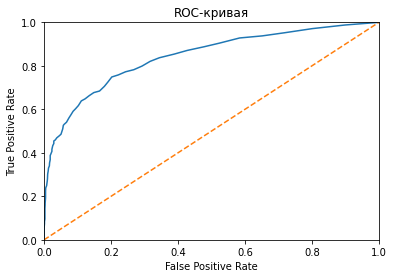


------------------------------

Тестовая выборка:
F1_score: 0.6064981949458483
AUC-ROC: 0.8492866576421401


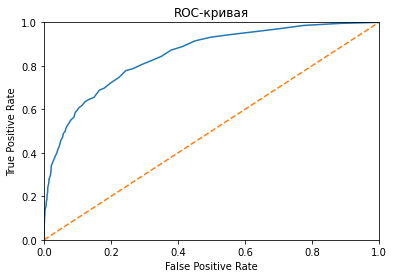

In [66]:
model =  RandomForestClassifier(random_state=12345, n_estimators=73, class_weight='balanced')
model.fit(dict_data["features_train"], dict_data["target_train"])

# Порог
threshold = 0.32


print("Валидационная выборка:")
probabilities_valid = model.predict_proba(dict_data["features_valid"])
probabilities_one_valid = probabilities_valid[:, 1]


predicted_valid = probabilities_one_valid > threshold

f1_score_valid = f1_score(dict_data["target_valid"], predicted_valid)
print("F1_score:", f1_score_valid)

auc_roc = roc_auc_score(dict_data["target_valid"], probabilities_one_valid)
print("AUC-ROC:",auc_roc)

fpr, tpr, thresholds = roc_curve(dict_data["target_valid"], probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

print()
print("-"*30)
print()


print("Тестовая выборка:")
probabilities_test = model.predict_proba(dict_data["features_test"])
probabilities_one_test = probabilities_test[:, 1]

predicted_test = probabilities_one_test > threshold

f1_score_test = f1_score(dict_data["target_test"], predicted_test )
print("F1_score:", f1_score_test)

auc_roc_test = roc_auc_score(dict_data["target_test"], probabilities_one_test)
print("AUC-ROC:",auc_roc_test)

fpr, tpr, thresholds = roc_curve(dict_data["target_test"], probabilities_one_test)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()


### Адекватность модели

In [62]:
# Список параметров для DummyClassifier
dummy_names = ["uniform", "most_frequent", "prior", "stratified"]

# Имена колонок отчета
columns = ["dummy parameter", "f1_score_valid", "auc_roc_valid", "f1_score_test", "auc_roc_test"]

data = []

# Перебираем параметры и смотрим результаты

for name in dummy_names:
    dummy_c_temp = DummyClassifier(strategy=name)
    dummy_c_temp.fit(dict_data["features_train"], dict_data["target_train"])
    
    
    ### Валидационная выборка
    predictions_valid = dummy_c_temp.predict(dict_data["features_valid"])
    
    accuracy_valid    = accuracy_score(dict_data["target_valid"], predictions_valid)
    f1_score_valid    = f1_score(dict_data["target_valid"], predictions_valid )
    auc_roc_valid     = roc_auc_score(target_valid, predictions_valid)
    
    
    ### Тестовая выборка
    predictions_test = dummy_c_temp.predict(dict_data["features_test"])
    
    accuracy_test    = accuracy_score(dict_data["target_test"], predictions_test)
    f1_score_test    = f1_score(dict_data["target_test"], predictions_test )
    auc_roc_test     = roc_auc_score(target_test, predictions_test)
    
    
    data.append([name, f1_score_valid, auc_roc_valid, f1_score_test, auc_roc_test])
    
report = pd.DataFrame(data=data, columns=columns)

In [63]:
render("Валидационная выборка")
render(report[report['f1_score_valid'] == report['f1_score_valid'].max()].head(), position="center")

render("Тестовая выборка")
render(report[report['f1_score_test'] == report['f1_score_test'].max()].head(), position="center")

,dummy parameter,f1_score_valid,auc_roc_valid,f1_score_test,auc_roc_test
0,uniform,0.307479,0.511442,0.282454,0.486420


,dummy parameter,f1_score_valid,auc_roc_valid,f1_score_test,auc_roc_test
0,uniform,0.307479,0.511442,0.282454,0.486420


<div class="total">
    <div class="banner">&nbsp;</div>
    <div class="description">
        <h3>Вывод по тестированию</h3>
        <p>- Лучший параметр среди валидационной выборки и тестовой выборки - параметр "uniform"</p>
        <p>- Данные совпадают</p>
        <p>- Показтели F1 и AUC_ROC ниже, чем у реальных расчетов</p>
    </div>
</div>

<h2>Общий вывод по проекту</h2>
<br>
<div class="content block">
    <div class="content body">
        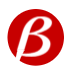
        <div class="content text">
            <p>В рамках проекта были выполнены следующие пункты:</p>
            <br>
            <strong><em><font color="white">Данные</font></em></strong>
            <div class="content display">
                <p>- считали файл</p>
                <p>- изучили данные</p>
                <p>- дублей не обнаружено</p>
                <p>- но зато нашли и исправили пропуски</p>
                <p>- удалили лишние столбцы, которые не влияют на посещаимость банка</p>
                <p>- преобразовали значения столбцов "Gender" и "Geography" в численные</p>
                <p>- разбили данные на обучающие, валидационную и тренировочную выборку</p>
                <p>- проверили на размер полученные данные</p>
                <p>- стандартизировали данные методом StandardScaler</p>
            </div>
            <br>
            <strong><em><font color="white">Исследование задачи</font></em></strong>
            <div class="content display">
                <p>- получили значения F1 и AUC_ROC для Логистической регрессии, Решающего дерева и Случайного леса</p>
                <p>- получили эти же метрики для сблансированных моделей и получили лучше показатели</p>
                <p>- получили эти же метрики и проверили порог классификации</p>
                <p>- проверили модель на адекватность и протестировали</p>
            </div>
            <br>
            <strong><em><font color="white">Резюме</font></em></strong>
            <div class="content display">
                <p>В проекте лучшей моделью выбрана модель случайного леса, с параметром <b>n_estimators=73</b></p>
                <p>и с параметром <b>class_weight="balanced"</b></p>
                <br>
                <p>Данная модель выбрана с порогом точности 0.32</p>
                <br>
                <p><b>Валидационная выборка:</b></p>
                <p>F1_score: 0.616</p>
                <p>AUC-ROC: 0.842</p>
                <br>
                <p>------------------------------</p>
                <br>
                <p><b>Тестовая выборка:</b></p>
                <p>F1_score: 0.606</p>
                <p>AUC-ROC: 0.849</p>
                <br>
                <p>Требование метрики F1 не ниже 0.59 выполнено!</p>
            </div>
            <br>
        </div>
     </div>
</div>